![Airbnb logo](https://japanesquest.com/wp-content/uploads/2017/10/airbnb-logo.png)

In [10]:
# To-do List
# LinearRegression, Ridge, Lasso, ElasticNet
# Ridge regressor
# Support Vector Regression (SVR) Linear Regression
# RandomForestRegressor and Logistic Regression
# Check again notebooks  Module 3: lab_boston_housing, 18.1.1.FeatureEngineering and 18.2.1.FeatureEngineering

In [2]:
# One hot encoding- Neighbourhood_group, neighbourhood, room_type
# standardize dataset
# <100K samples and few features: Lasso, ElasticNet
# <100K samples and more features: RidgeRegressor, SVR (linear) 
# RandomForestRegressor and Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [4]:
clean_sum_listings = pd.read_csv('clean_sum_listings.csv')

In [5]:
clean_sum_listings.columns

Index(['Unnamed: 0', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [6]:
def heatmap_ml (df):
    corr = df.corr().round(2)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(16, 8))

        ax = sns.heatmap(corr, cmap = 'RdBu_r', annot=True,  mask=mask, vmax=1, vmin= -1, square=True)

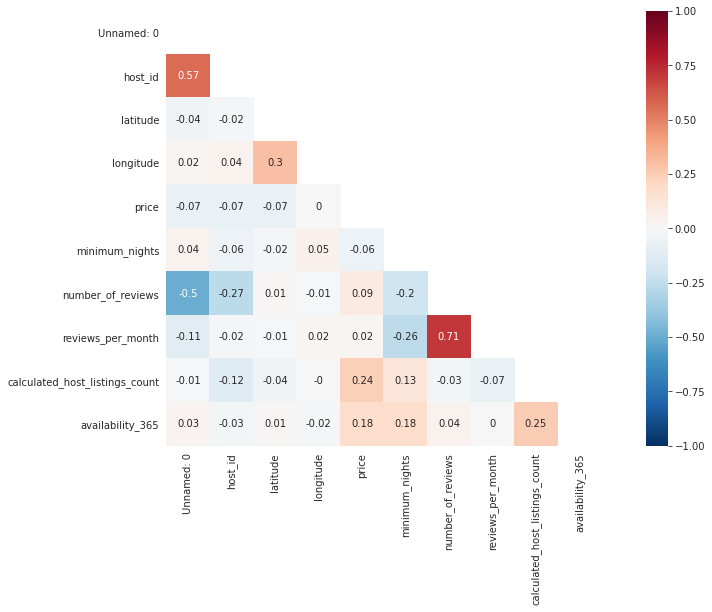

In [7]:
heatmap_ml(clean_sum_listings)

In [8]:
# Selecting columns with most information and removing the ones with correlation providing similar info
# neighbourhood, latitude and longitude offer the same info
# name and host_id don't seem relevant to train our model and might provoke overfitting

listings_features = clean_sum_listings[['neighbourhood_group', 'room_type', 'price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
listings_features.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Ciutat Vella,Private room,60,3,2,0.05,3,90
1,Gràcia,Entire home/apt,66,1,94,0.83,29,331
2,Gràcia,Entire home/apt,140,2,63,0.59,6,329
3,Ciutat Vella,Private room,100,5,8,0.07,3,180
4,Ciutat Vella,Private room,33,2,73,0.70,1,352


In [9]:
# One-Hot Enconding neighbourhood_group
dummy_neighbourhood_group = pd.get_dummies(listings_features['neighbourhood_group'])

# One-Hot Enconding room_type
dummy_roomtype =pd.get_dummies(listings_features['room_type'])

In [10]:
# Concatenating the two dummy dataframes into the original listing_features
listings_features = pd.concat([listings_features,dummy_neighbourhood_group,dummy_roomtype],axis=1)
listings_features.drop(['neighbourhood_group','room_type'],axis=1, inplace=True)
listings_features

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi,Entire home/apt,Hotel room,Private room,Shared room
0,60,3,2,0.05,3,90,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,66,1,94,0.83,29,331,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,140,2,63,0.59,6,329,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,100,5,8,0.07,3,180,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,2,73,0.70,1,352,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,20,1,0,0.00,5,365,1,0,0,0,0,0,0,0,0,0,0,0,1,0
15749,30,4,0,0.00,5,365,0,1,0,0,0,0,0,0,0,0,0,0,1,0
15750,100,31,0,0.00,1,89,0,0,0,0,0,0,0,1,0,0,1,0,0,0
15751,28,6,0,0.00,1,143,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [11]:
# let's separate the data into training and testing set

from sklearn.model_selection import train_test_split

# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(listings_features.drop('price', axis=1),
                                                    clean_sum_listings['price'],
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape

((12602, 19), (3151, 19))

In [12]:
listings_features.columns[1:]

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Ciutat Vella',
       'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'Nou Barris',
       'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype='object')

In [13]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [14]:
# let's compare the variable distributions before and after scaling

def plot_scaling(X_train, X_train_scaled):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=listings_features.columns[1:])

    # before scaling
    ax1.set_title('Before Scaling')
#    sns.kdeplot(X_train['minimum_nights'], ax=ax1)
    sns.kdeplot(X_train['number_of_reviews'], ax=ax1)
    sns.kdeplot(X_train['reviews_per_month'], ax=ax1)
#    sns.kdeplot(X_train['calculated_host_listings_count'], ax=ax1)
#    sns.kdeplot(X_train['availability_365'], ax=ax1)

    # after scaling
    ax2.set_title('After Standard Scaling')
#    sns.kdeplot(X_train_scaled['minimum_nights'], ax=ax2)
    sns.kdeplot(X_train_scaled['number_of_reviews'], ax=ax2)
    sns.kdeplot(X_train_scaled['reviews_per_month'], ax=ax2)
#    sns.kdeplot(X_train_scaled['calculated_host_listings_count'], ax=ax1)
#    sns.kdeplot(X_train_scaled['availability_365'], ax=ax1)
    plt.show()

### StandardScaler

In [21]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

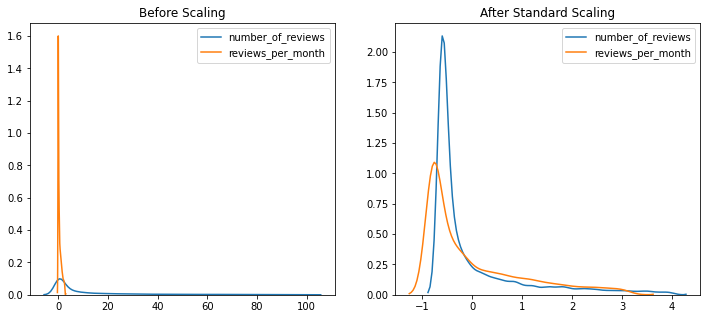

In [22]:
plot_scaling(X_train, X_train_scaled)

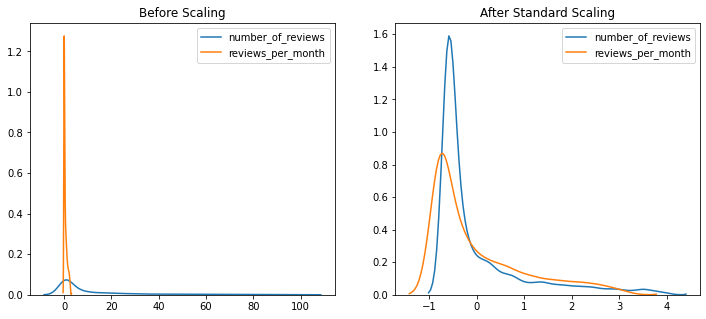

In [23]:
plot_scaling(X_test, X_test_scaled)

### RobustScaler

In [25]:
# As StandardScaler, MinMaxScaler is very sensitive to the presence of outliers

# Robust Scaler - the centering and scaling statistics of this scaler are based on percentiles and are 
# therefore not influenced by a few number of very large marginal outliers.

In [26]:
# RobustScaler transforms the feature vector by subtracting the median and then 
# dividing by the interquartile range (75% value — 25% value)

from sklearn.preprocessing import RobustScaler

robust = RobustScaler()

# fit the RobustScaler to the train set, it will learn the parameters
robust.fit(X_train)

# transform train and test sets
X_train_scaled = robust.transform(X_train)
X_test_scaled = robust.transform(X_test)

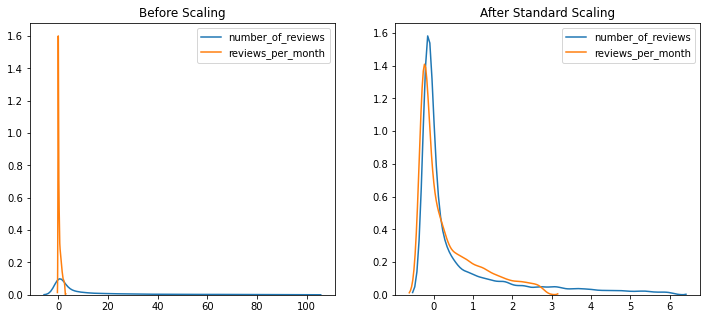

In [27]:
plot_scaling(X_train, X_train_scaled)

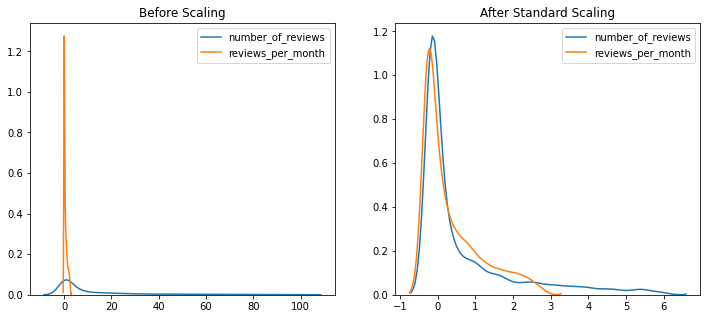

In [28]:
plot_scaling(X_test, X_test_scaled)

### LinearRegression, LassoCV, Ridge CV

#### LinearRegression

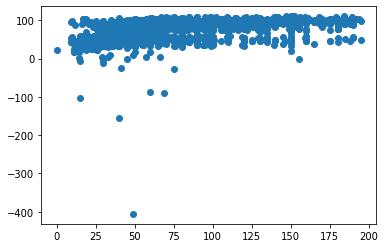

In [29]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)

In [30]:
LinearRegression().fit(X_train, y_train).score(X_test, y_test)

0.2779879616978985

In [33]:
LinearRegression().fit(X_train_scaled, y_train).score(X_train_scaled, y_train)

0.3429474730038663

In [31]:
LinearRegression().fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.27798796169789786

#### RidgeCV

In [32]:
RidgeCV(cv=5).fit(X_train_scaled, y_train).score(X_train_scaled, y_train)

0.3429468749832787

In [35]:
RidgeCV(cv=5).fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.2780587280609347

### Feature Selection

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state=42)

In [80]:
from sklearn.metrics import mean_absolute_error

In [91]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print("Mean Absolute error of the Model:")
print(mean_absolute_error(y_test, pred))

Mean Absolute error of the Model:
20.722341966552804


In [92]:
X_train.columns

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Ciutat Vella',
       'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'Nou Barris',
       'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi',
       'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype='object')

In [93]:
rf.feature_importances_

array([0.14666829, 0.07740576, 0.10828777, 0.14949745, 0.14850536,
       0.01387207, 0.01896784, 0.00866449, 0.00454688, 0.0041586 ,
       0.00219598, 0.00197558, 0.00902233, 0.00828029, 0.0065247 ,
       0.08015027, 0.00734916, 0.18332873, 0.02059846])

In [94]:
for name, importance in zip(X_train.columns, rf.feature_importances_):
    print(name, "=", importance)

minimum_nights = 0.14666829361932715
number_of_reviews = 0.07740575669316073
reviews_per_month = 0.10828777017493513
calculated_host_listings_count = 0.14949744624498065
availability_365 = 0.1485053593581259
Ciutat Vella = 0.013872070150881011
Eixample = 0.018967838845671315
Gràcia = 0.008664486984088041
Horta-Guinardó = 0.004546879007635716
Les Corts = 0.004158595777222036
Nou Barris = 0.002195975610818263
Sant Andreu = 0.00197558152889679
Sant Martí = 0.009022334649975736
Sants-Montjuïc = 0.008280294253896996
Sarrià-Sant Gervasi = 0.006524699435096034
Entire home/apt = 0.08015026580539476
Hotel room = 0.007349156930516013
Private room = 0.1833287322209105
Shared room = 0.020598462708467297


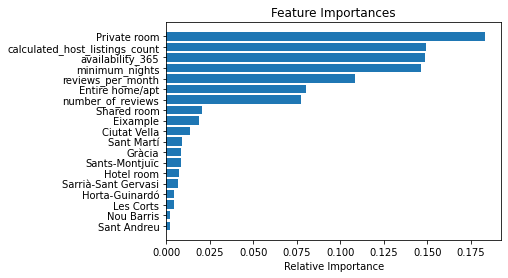

In [95]:
features = X_train.columns
importances =  rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()